<a href="https://colab.research.google.com/github/lorenzomazzante/ML01/blob/main/TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 - TD1 : Classifieur des plus proches voisins - Exercices

Réalisé par Cyprien Gilet et Khaled Belahcene

## Énoncé et bases de données
On considère la base de données d'apprentissage suivante où les observations $A,\dots,J$ sont décrites par 2 variables numériques. Chaque observation appartient à une classe $k\in\{1,2\}$ (notre variable d'intérêt).

| Observation | Variable 1 | Variable 2 | Classe |
| --- | --- | --- | --- |
| A	| 8	| 2	| 1 |
| B	| 4	| 5	| 2 |
| C	| 4	| 3	| 1 |
| D	| 7	| 8	| 2 |
| E	| 2	| 4	| 1 |
| F	| 7	| 4	| 2 |
| G	| 1	| 6	| 1 |
| H	| 8	| 3	| 1 |
| I	| 6	| 2	| 1 |
| J	| 5	| 8	| 2 |

L'objectif de ce TD est d'utiliser le classifieur des plus proches voisins pour prédire la classe des observations test $K,L,M$ suivantes (on suppose que les classes réelles de ces observations test sont inconnues et on souhaite les retrouver grâce au classifieur des plus proches voisins).

| Observation | Variable 1 | Variable 2 | Classe |
| --- | --- | --- | --- |
| K	| 4	| 7	| 1 |
| L	| 6	| 6	| 2 |
| M	| 1	| 2	| 1 |

## Partie 1. Exercice sur feuille

**Question 1.1.** Représenter le nuage des points $A,\dots,J$ dans un repère en fonction des deux variables descriptives (de sorte à bien différencier les observations appartenant à la classe 1 de celles appartenant à la classe 2).

**Question 1.2.** Sur cette même figure, représenter les points $K,L,M$ et prédire leur classe avec le classifieur du plus plroche voisin (1 seul voisin). Comparer les classes prédites avec leur classe réelle.

## Partie 2. Implémentation sur Python

L'objectif de cette partie est d'implémenter l'algorithme des plus proches voisins en Python.
Le code ci-dessous permet d'importer les librairies importantes.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Le code ci-dessous définit notre base d'apprentissage et notre base de test.

In [51]:
#### Base d'apprentissage :

# Noms des observations
ObsNamesTrain = np.array(['A','B','C','D','E','F','G','H','I','J'])

# Variables descriptives
XTrain = np.array([[8, 2],
       [4, 5],
       [4, 3],
       [7, 8],
       [2, 4],
       [7, 4],
       [1, 6],
       [8, 3],
       [6, 2],
       [5, 8]])

# Classes réelles (labels)
YTrain = np.array([1,2,1,2,1,2,1,1,1,2])



#### Base de Test :

# Noms des observations
ObsNamesTest = np.array(['K','L','M'])

# Variables descriptives
XTest = np.array([[4, 7],
       [6, 6],
       [1, 2]])

# Classes réelles (labels) que l'on supposera inconnues
YTest = np.array([1,2,1])

**Question 2.1.** Implémenter une fonction des $q$ plus proches voisins (qui prenne en entrés : $XTrain, YTrain, XTest$, $K$ le nombre de classes, et $q\geq 1$ le nombre de voisins que nous souhaiterons considérer), et qui nous ressorte la classe estimée d'une seule observation de XTest. Pour cela, on pourra s'aider des fonctions Python suivantes :
- Boucle en Python : https://wiki.python.org/moin/ForLoop
- np.shape : (dimensions d'une matrice) : https://numpy.org/doc/stable/reference/generated/numpy.shape.html
- np.argsort : (indices d'un vecteur trié) : https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
- np.zeros : (création d'un vecteur rempli de 0) :  https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
- np.linalg.norm : (calcul distance euclidienne) : https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
- np.argmax : (indice du maximum) : https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

In [52]:
def function_qNN(XTrain, YTrain, XTest, K, q):

  # 1) Identifier les q plus proche voisins
  n = np.shape(XTrain)[0]
  dist = np.zeros(n)

  for i in range(n):
      #calculo la distancia euclediana
      distance = np.linalg.norm(XTest - XTrain[i,:])
      dist[i] = distance

  idx_q_ppv = np.argsort(dist)[0:q]

  # 2) Obtener les clases des ppv

  voisins_classes = YTrain[idx_q_ppv]

  YTest = np.argmax(np.bincount(voisins_classes, minlength=K))

  return YTest

**Question 2.2.** Estimer la classe des observations test $K,L,M$ à l'aide de la fonction *function_qNN* en considérant $q=1$ voisin. Comparer ces estimations avec celles obtenues en Question 1.2 puis avec les classes réelles.

In [53]:
k = 2
q = 1

for i in range(XTest.shape[0]):
  YTest = function_qNN(XTrain, YTrain, XTest[i], k, q)
  print (YTest)

2
2
1


**Question 2.3.** Compiler le code ci-dessous pour afficher les frontières de décision obtenues avec la fonction *function_qNN* (en augmentant le nombre de voisins $q$).

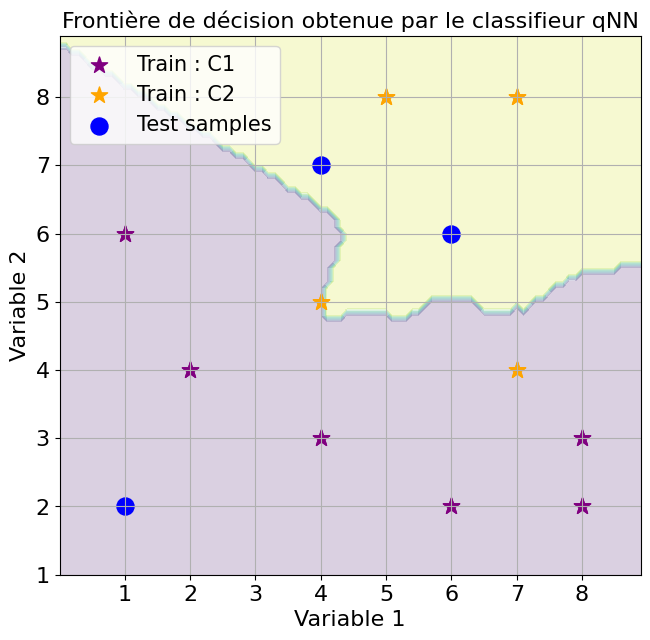

In [54]:
K = 2 #Nombre de classes

q = 5 #Nombre de voisins


def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


xx1, xx2 = make_meshgrid(XTrain[:,0], XTrain[:,1])
XXgrid = np.c_[xx1.ravel(), xx2.ravel()]
Z = np.zeros((1, XXgrid.shape[0]))
for i in range(0, XXgrid.shape[0]):
    Z[0,i] = function_qNN(XTrain, YTrain, XXgrid[i,:], K, q)
Z = Z.reshape(xx1.shape)


figScatter = plt.figure(figsize=(7.5,7))
ax = figScatter.add_subplot(1,1,1)
out = ax.contourf(xx1, xx2, Z, alpha=0.2)
ax.scatter(XTrain[(np.where(YTrain==1)[0]),0].tolist(), XTrain[(np.where(YTrain==1)[0]),1].tolist(), color='purple', marker='*', label='Train : C1',s=150)
ax.scatter(XTrain[(np.where(YTrain==2)[0]),0].tolist(), XTrain[(np.where(YTrain==2)[0]),1].tolist(), color='orange', marker='*', label='Train : C2',s=150)
ax.scatter(XTest[:,0].tolist(), XTest[:,1].tolist(), color='blue', marker='o', label='Test samples',s=150)
ax.legend(fontsize=15, loc='upper left')
ax.scatter(XTrain[(np.where(YTrain==1)[0]),0].tolist(), XTrain[(np.where(YTrain==1)[0]),1].tolist(), color='purple', marker='*', label='Class 1',s=150)
ax.scatter(XTrain[(np.where(YTrain==2)[0]),0].tolist(), XTrain[(np.where(YTrain==2)[0]),1].tolist(), color='orange', marker='*', label='Class 2',s=150)
ax.set_xlabel("Variable 1",fontsize=16)
ax.set_ylabel("Variable 2",fontsize=16)
ax.set_xticks(np.arange(1,9,1))
ax.set_yticks(np.arange(1,9,1))
ax.set_title("Frontière de décision obtenue par le classifieur qNN",fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid()

## Partie 3. Utilisation de Scikit-Learn

L'objectif de cette partie est d'utiliser l'algorithme des plus proches voisins proposé par Scikit-Learn.
Plus d'informations sont disponibles ici : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

**Question 3.1.** Appliquer l'algorithme des plus proches voisins proposé par Scikit-Learn sur les trois observations test $K,L,M$ puis comparer les résultats avec ceux obtenus par votre fonction précédente puis avec les classes réelles.

In [42]:
k=2
q=1

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = q)
neigh.fit(XTrain, YTrain)
print(neigh.predict(XTest))

[2 2 1]


## Partie 4. Classifieur Euclidien

Si vous avez le temps, refaire toutes les questions précédentes avec le classifieur Euclidien.
Concernant la fonction Scikit-Learn, plus d'informations sont disponibles ici : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid

In [58]:
def function_CEuclidien(XTrain, YTrain, XTest, K):
  n = np.shape(XTrain)[0]

  # 1) Identifier les centroides
  centroides = np.zeros((K, np.shape(XTrain)[1]))
  for i in range(K):
    centroides[i,:] = np.mean(XTrain[np.where(YTrain==i+1)[0],:], axis=0)
  print(centroides)

  # 2) Determinar el centroide mas cercano
  dist = np.zeros(K)
  for i in range(K):
    dist[i] = np.linalg.norm(XTest - centroides[i,:])
  print (dist)

  YTest = np.argmin(dist) + 1
  return YTest


In [61]:
#Tryion in te the last function
for i in range(XTest.shape[0]):
  YTest = function_CEuclidien(XTrain, YTrain, XTest[i], K)
  print (YTest)

[[4.83333333 3.33333333]
 [5.75       6.25      ]]
[3.76017139 1.90394328]
2
[[4.83333333 3.33333333]
 [5.75       6.25      ]]
[2.9107082  0.35355339]
2
[[4.83333333 3.33333333]
 [5.75       6.25      ]]
[4.05859855 6.37377439]
1
